In [6]:
%pip install numpy matplotlib

  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.2 MB/s eta 0:00:00a 0:00:01
Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl (3.1 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


# Tabu Search

Best solution found: [20, 5, 0, 0]
Fitness value: 0


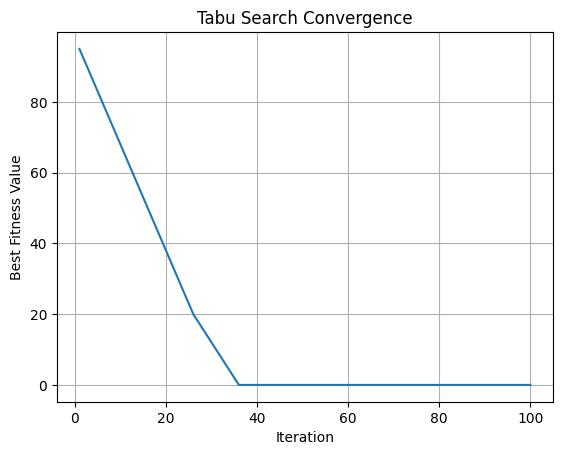

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

class TabuSearch:
    def __init__(self, tabu_tenure=10):
        self.tabu_list = []
        self.tabu_tenure = tabu_tenure
        self.fitness_history = []

    def create_initial_solution(self):
        # Start with values that are likely to give a good solution
        return [20, 15, 25, 30]
    
    def evaluate_solution(self, solution):
        a, b, c, d = solution
        return abs(a + 2*b + 3*c + 4*d - 30)
    
    def get_neighbors(self, current_solution):
        neighbors = []
        
        for i in range(len(current_solution)):
            new_value = (current_solution[i] + 1) % 31
            neighbors.append(current_solution[:i] + [new_value] + current_solution[i+1:])
            
            new_value = (current_solution[i] - 1) % 31
            neighbors.append(current_solution[:i] + [new_value] + current_solution[i+1:])
            
        return neighbors
    
    def run(self, max_iterations=100):
        current_solution = self.create_initial_solution()
        best_solution = current_solution
        
        for iteration in range(max_iterations):
            neighbors = self.get_neighbors(current_solution)
            
            best_neighbor = None
            best_neighbor_value = float('inf')
            
            for neighbor in neighbors:
                if neighbor not in self.tabu_list:
                    value = self.evaluate_solution(neighbor)
                    if value < best_neighbor_value:
                        best_neighbor = neighbor
                        best_neighbor_value = value
            
            if best_neighbor is not None:
                current_solution = best_neighbor
                self.tabu_list.append(current_solution)
                
                if len(self.tabu_list) > self.tabu_tenure:
                    self.tabu_list.pop(0)
            
            current_value = self.evaluate_solution(current_solution)
            if current_value < self.evaluate_solution(best_solution):
                best_solution = current_solution.copy()
                
            # Track best fitness in each iteration
            self.fitness_history.append(self.evaluate_solution(best_solution))
        
        return best_solution, self.evaluate_solution(best_solution)
    
    def plot_fitness(self):
        plt.plot(range(1, len(self.fitness_history) + 1), self.fitness_history)
        plt.xlabel("Iteration")
        plt.ylabel("Best Fitness Value")
        plt.title("Tabu Search Convergence")
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    ts = TabuSearch()
    best_solution, fitness = ts.run()

    print(f"Best solution found: {best_solution}")
    print(f"Fitness value: {fitness}")
    ts.plot_fitness()

# genetic_algorithm

Best solution found: [10, 1, 28, 9]
Fitness value: 102


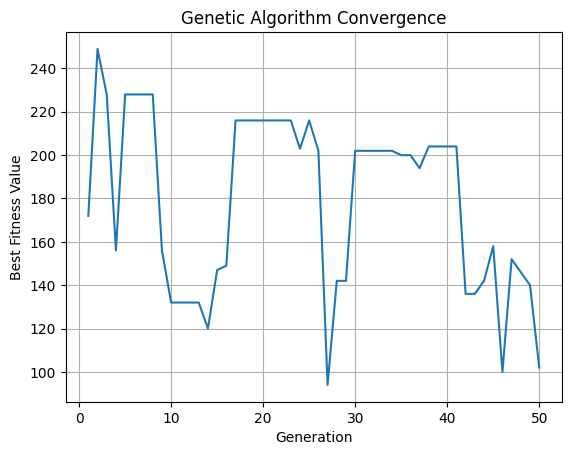

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, population_size=6, generations=50):
        self.population_size = population_size
        self.generations = generations
        self.fitness_history = []

    def create_initial_population(self):
        return [random.sample(range(0, 31), 4) for _ in range(self.population_size)]

    def fitness_function(self, chromosome):
        a, b, c, d = chromosome
        return abs(a + 2*b + 3*c + 4*d - 30)
    
    def calculate_population_fitness(self, population):
        return [self.fitness_function(chromosome) for chromosome in population]

    def select_parents(self, population):
        fitness_values = self.calculate_population_fitness(population)
        total_fitness = sum(fitness_values)
        selected = []

        for _ in range(2):
            r = random.uniform(0, total_fitness)
            current_sum = 0
            for i, fitness in enumerate(fitness_values):
                current_sum += fitness
                if current_sum > r:
                    selected.append(i)
                    break
        return [population[i] for i in selected]
    
    def crossover(self, parent1, parent2):
        cut_point = random.randint(0, len(parent1) - 1)
        child1 = parent1[:cut_point] + parent2[cut_point:]
        child2 = parent2[:cut_point] + parent1[cut_point:]
        return [child1, child2]

    def mutate(self, chromosome):
        for i in range(len(chromosome)):
            if random.random() < 0.1:
                chromosome[i] = random.randint(0, 30)
        return chromosome
    
    def run(self):
        population = self.create_initial_population()
        
        for generation in range(self.generations):
            new_population = []
            
            parents = self.select_parents(population)
            children = []
            
            for i in range(0, len(parents), 2):
                if i+1 < len(parents):
                    child1, child2 = self.crossover(parents[i], parents[i+1])
                    new_population.extend([child1, child2])
                    
            population = [self.mutate(chromosome) for chromosome in new_population]
            
            # Track best fitness in each generation
            best_chromosome = min(population, key=self.fitness_function)
            best_fitness = self.fitness_function(best_chromosome)
            self.fitness_history.append(best_fitness)
        
        return min(population, key=self.fitness_function)
    
    def plot_fitness(self):
        plt.plot(range(1, self.generations + 1), self.fitness_history)
        plt.xlabel("Generation")
        plt.ylabel("Best Fitness Value")
        plt.title("Genetic Algorithm Convergence")
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    ga = GeneticAlgorithm()
    best_solution = ga.run()
    
    print(f"Best solution found: {best_solution}")
    print(f"Fitness value: {ga.fitness_function(best_solution)}")
    ga.plot_fitness()